# Import necessary libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

# Task 3 Load the dataset

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

# Task 4: Generate Descriptive Statistics and Visualizations

- **Boxplot for the "Median value of owner-occupied homes"**

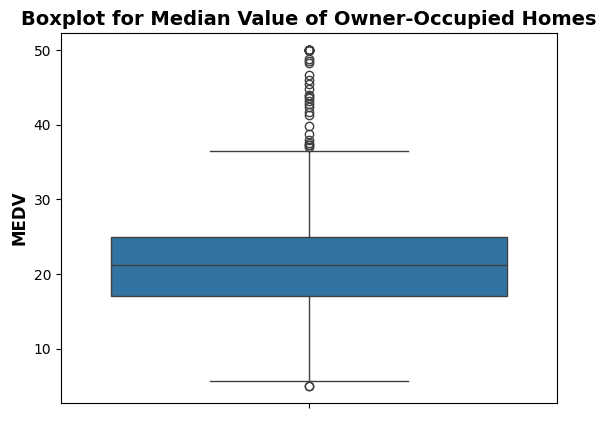

In [3]:
plot = sns.boxplot(y='MEDV', data=boston_df)
plot.set_xlabel(' ', fontsize=12, weight='bold')  # No x-label in this case
plot.set_ylabel('MEDV', fontsize=12, weight='bold')
plot.set_title('Boxplot for Median Value of Owner-Occupied Homes', fontsize=14, weight='bold')
plt.show()

**Expanation/Interpretation**

Based on the boxplot above, here are some observations about the Median Value of Owner-Occupied Homes (MEDV):

1. **Central Tendency**: The median value of MEDV is around 25. This means that half of the owner-occupied homes have a median value below 25, and half have a value above 25.

2. **Interquartile Range (IQR)**: The IQR, represented by the box, ranges from approximately 20 to 30. This means that the middle 50% of owner-occupied homes have a median value between 20 and 30.

3. **Variability**: The whiskers extend from just below 10 to just above 40. This indicates that the majority of the data (excluding outliers) falls within this range.

4. **Outliers**: The dots above the upper whisker represent outliers. These are specific data points that fall far outside the normal range. This suggests that there are some owner-occupied homes with a median value significantly higher than the majority.

5. **Skewness**: Since the median (the line inside the box) is closer to the third quartile (the top of the box), the distribution might be slightly skewed to the left. This means there might be a larger number of owner-occupied homes with a median value above the overall median.

- **Bar plot for the Charles river variable**

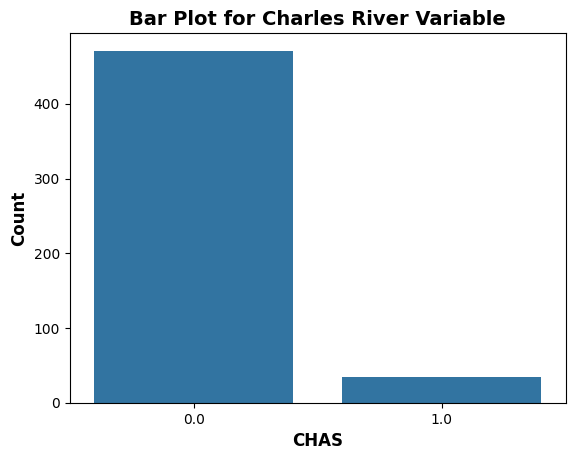

In [4]:
plot = sns.countplot(x='CHAS', data=boston_df)
plot.set_xlabel('CHAS', fontsize=12, weight='bold')
plot.set_ylabel('Count', fontsize=12, weight='bold')
plot.set_title('Bar Plot for Charles River Variable', fontsize=14, weight='bold')
plt.show()

**Expanation/Interpretation**

Based on the bar plot for the Charles River variable (CHAS), here are some observations:

1. **Categories**: The CHAS variable has two categories, `0.0` and `1.0`. These likely represent whether a property is bound by the Charles River (`1.0`) or not (`0.0`).

2. **Count**: There are significantly more properties not bound by the river (`0.0`) than those that are (`1.0`). The count for `0.0` is over 400, while the count for `1.0` is below 100.

This suggests that the majority of the properties in the dataset are not bound by the Charles River. 

- **Boxplot for the MEDV variable vs the AGE variable**

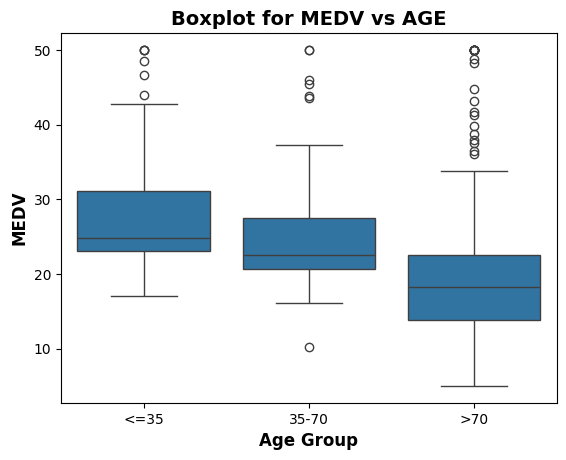

In [5]:
# Discretize the age variable with shorter labels
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0,35,70,100], labels=['<=35', '35-70', '>70'])

# Nowcreate the boxplot
plot = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plot.set_xlabel('Age Group', fontsize=12, weight='bold')
plot.set_ylabel('MEDV', fontsize=12, weight='bold')
plot.set_title('Boxplot for MEDV vs AGE', fontsize=14, weight='bold')
plt.show()


**Expanation/Interpretation**

- The boxplot suggests different distributions of MEDV values across three age groups: "35 years and younger", "between 35 and 70 years", and "70 years and older".
- Each age group has a distinct distribution of MEDV values, with some values falling outside the typical range, represented as outliers.
- This indicates that the median value of owner-occupied homes varies depending on the age group of the properties. Let me know if you have any other questions or need further clarification.

- **Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

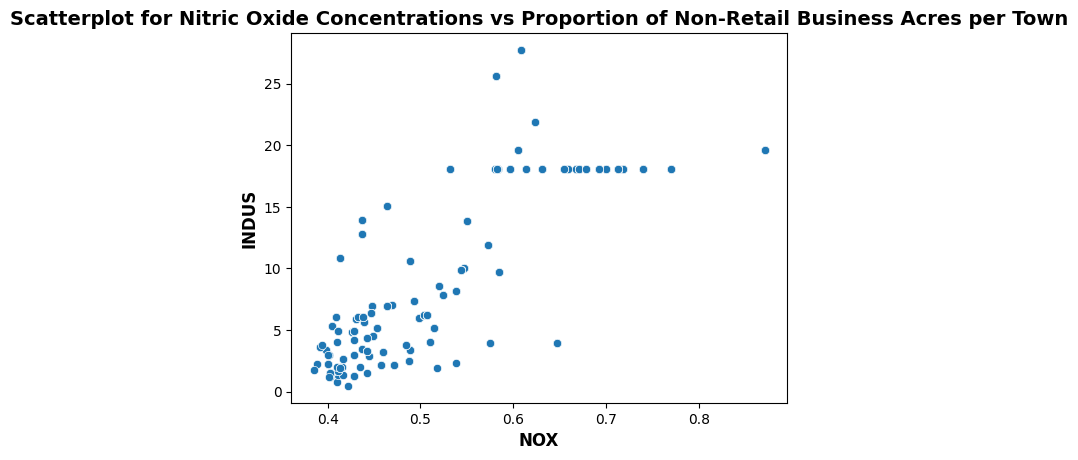

In [6]:
plot = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plot.set_xlabel('NOX', fontsize=12, weight='bold')
plot.set_ylabel('INDUS', fontsize=12, weight='bold')
plot.set_title('Scatterplot for Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres per Town', fontsize=14, weight='bold')
plt.show()

**Expanation/Interpretation**

- The scatter plot shows a positive correlation between Nitric Oxide Concentrations (NOX) and the Proportion of Non-Retail Business Acres per Town (INDUS). As NOX increases, INDUS also tends to increase.
- There's a concentration of data points at lower NOX values, indicating higher density of non-retail business acres in areas with lower nitric oxide concentrations.
- As NOX increases, there are fewer data points but they are spread out more on the INDUS axis.

This suggests that areas with higher nitric oxide concentrations tend to have a larger proportion of non-retail business acres per town. However, there are fewer such areas compared to those with lower nitric oxide concentrations.

- **Histogram for the pupil to teacher ratio variable**


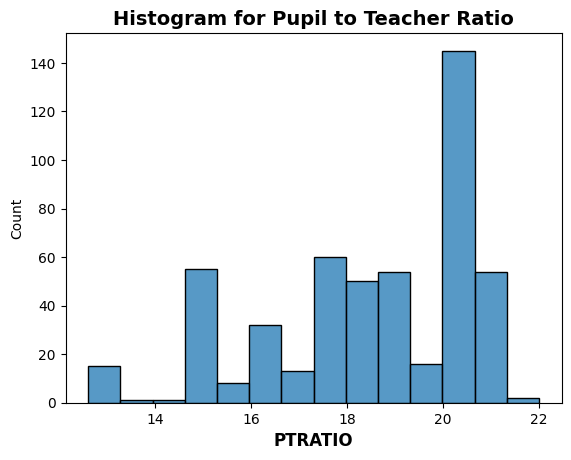

In [7]:
plot = sns.histplot(boston_df['PTRATIO'])
plot.set_xlabel('PTRATIO', fontsize=12, weight='bold')
plot.set_title('Histogram for Pupil to Teacher Ratio', fontsize=14, weight='bold')
plt.show()

**Expanation/Interpretation**

The histogram shows the distribution of the Pupil to Teacher Ratio (PTRATIO). Here are some insights:

- The x-axis represents different PTRATIO values, and the y-axis represents the count of occurrences for each ratio.
- There are peaks at PTRATIOS of approximately 15, 19, and a significant peak at 21.
- The bar heights vary, indicating different frequencies of each pupil-to-teacher ratio within the data.

This suggests that the most common pupil-to-teacher ratio is around 21, with other notable concentrations around 15 and 19. However, the distribution is quite varied, indicating a wide range of pupil-to-teacher ratios in the dataset.

# Task 5: Use the appropriate tests to answer the questions provided


**The null and alternate hypothesis for four of the tests**
1. **T-test for independent samples (Charles River variable)**:
    - Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles river.
    - Alternate Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles river.

2. **ANOVA (AGE variable)**:
    - Null Hypothesis (H0): There is no difference in median values of houses for each proportion of owner-occupied units built prior to 1940.
    - Alternate Hypothesis (H1): There is a difference in median values of houses for each proportion of owner-occupied units built prior to 1940.

3. **Pearson Correlation (Nitric oxide concentrations and proportion of non-retail business acres per town)**:
    - Null Hypothesis (H0): There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
    - Alternate Hypothesis (H1): There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

4. **Regression analysis (Impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes)**:
    - Null Hypothesis (H0): There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.
    - Alternate Hypothesis (H1): There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.

1. **T-test for independent samples**

In [8]:
chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_val = stats.ttest_ind(chas0, chas1)
print(f'T-statistic: {t_stat}, P-value: {p_val}')


T-statistic: -3.996437466090509, P-value: 7.390623170519905e-05


- **Conclusion**

If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in the median value of houses bounded by the Charles river. If the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant difference. 

Given the results of the test, where the T-statistic is -3.996437466090509 and the P-value is 7.390623170519905e-05, we can interpret the results as follows:

The P-value is less than 0.05 (in fact, it's much smaller). Therefore, we reject the null hypothesis. This leads us to conclude that there is a significant difference in the median value of houses bounded by the Charles river.

2. **ANOVA**

In [12]:
f_stat, p_val = stats.f_oneway(boston_df[boston_df['age_group'] == '<=35']['MEDV'],
                               boston_df[boston_df['age_group'] == '35-70']['MEDV'],
                               boston_df[boston_df['age_group'] == '>70']['MEDV'])
print(f'F-statistic: {f_stat}, P-value: {p_val}')

F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


- **Conclusion**

Given the results of the test, where the F-statistic is 36.40764999196599 and the P-value is 1.7105011022702984e-15, we can interpret the results as follows:

The P-value is much less than 0.05. Therefore, we reject the null hypothesis. This leads us to conclude that there is a significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940.

3. **Pearson Correlation**

In [10]:
corr, _ = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Pearsons correlation: {corr}')

Pearsons correlation: 0.7636514469209157


The Pearson correlation coefficient is 0.7636514469209157, which indicates a strong positive relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. This suggests that as Nitric oxide concentrations increase, the proportion of non-retail business acres per town also tends to increase.

4. **Regression analysis**

In [11]:
X = boston_df['DIS'].values.reshape(-1,1)
y = boston_df['MEDV'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)
print(f'Coefficient: {reg.coef_}')

Coefficient: [[1.09161302]]


The coefficient of the linear regression is 1.09161302. This indicates that for each additional unit of weighted distance to the five Boston employment centres, the median value of owner-occupied homes increases by approximately $1,091.61 (in $1000's), assuming all other factors remain constant. This suggests that proximity to employment centres may have a positive impact on housing values.